In [64]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import KFold, train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler,RobustScaler,StandardScaler
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

from feature_engine.selection import (
    RecursiveFeatureElimination,
    DropConstantFeatures,
    DropDuplicateFeatures,
)
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from operator import itemgetter
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import f_classif, mutual_info_classif, VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
np.random.seed(42)


#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Allow long lines


#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Allow long lines

In [2]:
# Specify the path to the CSV file in the parent directory
file_path = "../Dataset/pd_speech_features/pd_speech_features.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, sep=',',skiprows=1)
df.drop("id", axis=1, inplace=True)
X = df.iloc[:,0:753]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

In [3]:
X.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,GNE_SNR_SEO,GNE_NSR_TKEO,GNE_NSR_SEO,VFER_mean,VFER_std,VFER_entropy,VFER_SNR_TKEO,VFER_SNR_SEO,VFER_NSR_TKEO,VFER_NSR_SEO,IMF_SNR_SEO,IMF_SNR_TKEO,IMF_SNR_entropy,IMF_NSR_SEO,IMF_NSR_TKEO,IMF_NSR_entropy,mean_Log_energy,mean_MFCC_0th_coef,mean_MFCC_1st_coef,mean_MFCC_2nd_coef,mean_MFCC_3rd_coef,mean_MFCC_4th_coef,mean_MFCC_5th_coef,mean_MFCC_6th_coef,mean_MFCC_7th_coef,mean_MFCC_8th_coef,mean_MFCC_9th_coef,mean_MFCC_10th_coef,mean_MFCC_11th_coef,mean_MFCC_12th_coef,mean_delta_log_energy,mean_0th_delta,mean_1st_delta,mean_2nd_delta,mean_3rd_delta,mean_4th_delta,mean_5th_delta,mean_6th_delta,mean_7th_delta,mean_8th_delta,mean_9th_delta,mean_10th_delta,mean_11th_delta,mean_12th_delta,mean_delta_delta_log_energy,mean_delta_delta_0th,mean_1st_delta_delta,mean_2nd_delta_delta,mean_3rd_delta_delta,mean_4th_delta_delta,mean_5th_delta_delta,mean_6th_delta_delta,mean_7th_delta_delta,mean_8th_delta_delta,mean_9th_delta_delta,mean_10th_delta_delta,mean_11th_delta_delta,mean_12th_delta_delta,std_Log_energy,std_MFCC_0th_coef,std_MFCC_1st_coef,std_MFCC_2nd_coef,std_MFCC_3rd_coef,std_MFCC_4th_coef,std_MFCC_5th_coef,std_MFCC_6th_coef,std_MFCC_7th_coef,std_MFCC_8th_coef,std_MFCC_9th_coef,std_MFCC_10th_coef,std_MFCC_11th_coef,std_MFCC_12th_coef,std_delta_log_energy,std_0th_delta,std_1st_delta,std_2nd_delta,std_3rd_delta,std_4th_delta,std_5th_delta,std_6th_delta,std_7th_delta,std_8th_delta,std_9th_delta,std_10th_delta,std_11th_delta,std_12th_delta,std_delta_delta_log_energy,std_delta_delta_0th,std_1st_delta_delta,std_2nd_delta_delta,std_3rd_delta_delta,std_4th_delta_delta,std_5th_delta_delta,std_6th_delta_delta,std_7th_delta_delta,std_8th_delta_delta,std_9th_delta_delta,std_10th_delta_delta,std_11th_delta_delta,std_12th_delta_delta,Ea,Ed_1_coef,Ed_2_coef,Ed_3_coef,Ed_4_coef,Ed_5_coef,Ed_6_coef,Ed_7_coef,Ed_8_coef,Ed_9_coef,Ed_10_coef,det_entropy_shannon_1_coef,det_entropy_shannon_2_coef,det_entropy_shannon_3_coef,det_entropy_shannon_4_coef,det_entropy_shannon_5_coef,det_entropy_shannon_6_coef,det_entropy_shannon_7_coef,det_entropy_shannon_8_coef,det_entropy_shannon_9_coef,det_entropy_shannon_10_coef,det_entropy_log_1_coef,det_entropy_log_2_coef,det_entropy_log_3_coef,det_entropy_log_4_coef,det_entropy_log_5_coef,det_entropy_log_6_coef,det_entropy_log_7_coef,det_entropy_log_8_coef,det_entropy_log_9_coef,det_entropy_log_10_coef,det_TKEO_mean_1_coef,det_TKEO_mean_2_coef,det_TKEO_mean_3_coef,det_TKEO_mean_4_coef,det_TKEO_mean_5_coef,det_TKEO_mean_6_coef,det_TKEO_mean_7_coef,det_TKEO_mean_8_coef,det_TKEO_mean_9_coef,det_TKEO_mean_10_coef,det_TKEO_std_1_coef,det_TKEO_std_2_coef,det_TKEO_std_3_coef,det_TKEO_std_4_coef,det_TKEO_std_5_coef,det_TKEO_std_6_coef,det_TKEO_std_7_coef,det_TKEO_std_8_coef,det_TKEO_std_9_coef,det_TKEO_std_10_coef,app_entropy_shannon_1_coef,app_entropy_shannon_2_coef,app_entropy_shannon_3_coef,app_entropy_shannon_4_coef,app_entropy_shannon_5_coef,app_entropy_shannon_6_coef,app_entropy_shannon_7_coef,app_entropy_shannon_8_coef,app_entropy_shannon_9_coef,app_entropy_shannon_10_coef,app_entropy_log_1_coef,app_entropy_log_2_coef,app_entropy_log_3_coef,app_entropy_log_4_coef,app_entropy_log_5_coef,app_entropy_log_6_coef,app_entropy_log_7_coef,app_entropy_log_8_coef,app_entropy_log_9_coef,app_entropy_log_10_coef,app_det_TKEO_mean_1_coef,app_det_TKEO_mean_2_coef,app_det_TKEO_mean_3_coef,app_det_TKEO_mean_4_coef,app_det_TKEO_mean_5_coef,app_det_TKEO_mean_6_coef,app_det_TKEO_mean_7_coef,app_det_TKEO_mean_8_coef,app_det_TKEO_mean_9_coef,app_det_TKEO_mean_10_coef,app_TKEO_std_1_coef,app_TKEO_std_2_coef,app_TKEO_std

In [4]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

# Remove constant features

The DropConstantFeatures class from Feature-engine finds and removes constant and quasi-constant features from a dataset. We can remove constant features by setting the parameter tol to 1, or quasi-constant with smaller values for tol.

In [5]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')

sel.fit(X)

DropConstantFeatures()

In [6]:
# list of constant features

sel.features_to_drop_

[]

# Remove quasi-constant features

In [7]:
sel = DropConstantFeatures(tol=0.998, variables=None, missing_values='raise')

sel.fit(X)

DropConstantFeatures(tol=0.998)

In [8]:
# number of quasi-constant features

len(sel.features_to_drop_)

0

# Remove duplicated features

In [9]:
# set up the selector
sel = DropDuplicateFeatures(variables=None, missing_values='raise')

# find the duplicate features, this might take a while
sel.fit(X)

DropDuplicateFeatures(missing_values='raise')

In [10]:
# these are the pairs of duplicated features
# each set are duplicates

sel.duplicated_feature_sets_

[]

# Correlation Heatmap

<AxesSubplot:>

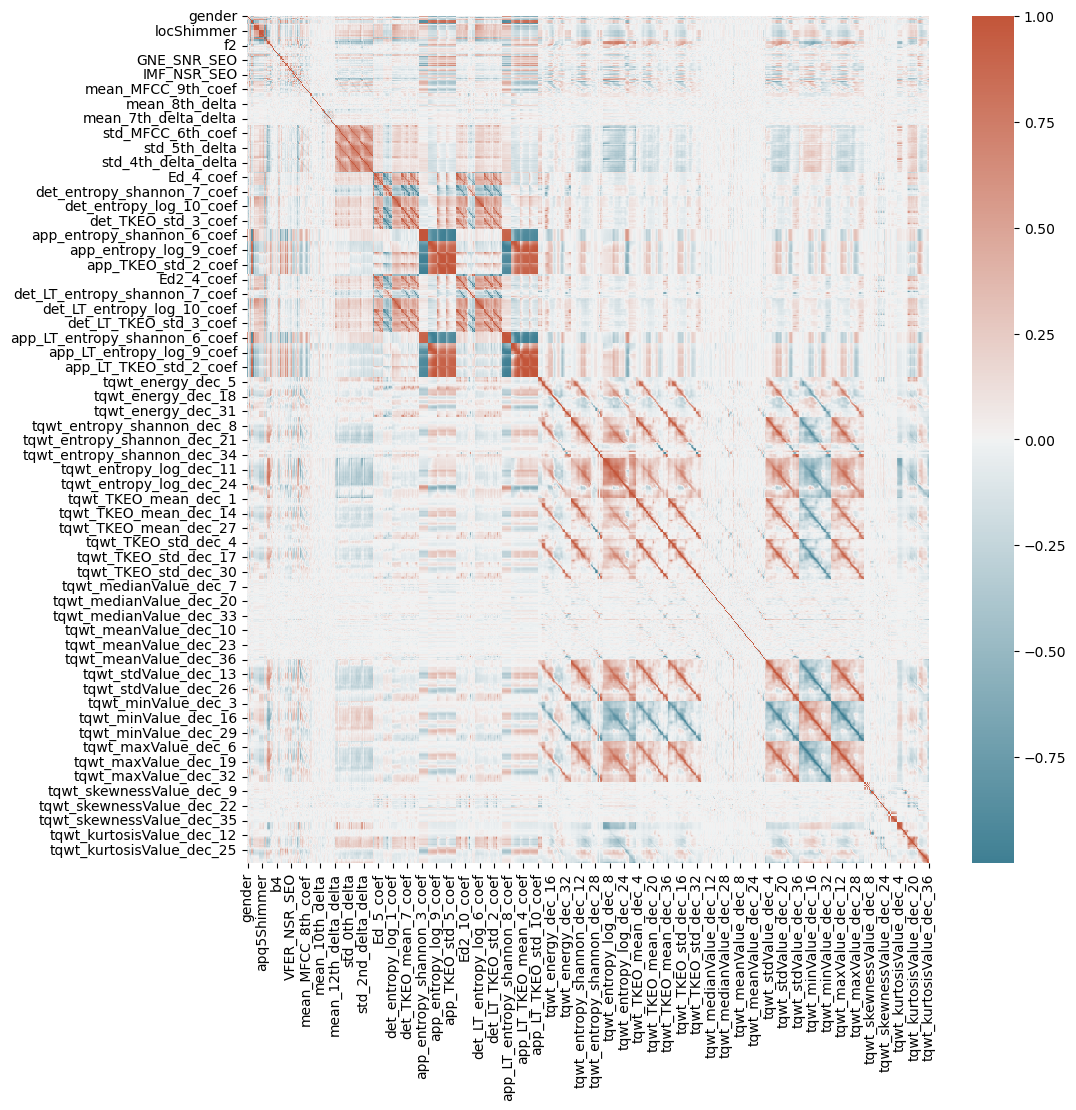

In [11]:
# visualise correlated features:

# I will build a correlation matrix, which examines the 
# correlation of all features (that is, for all possible feature combinations)
# and then visualise the correlation matrix using a heatmap

# the default correlation method of pandas.corr is pearson
# I include it anyways for the demo
corrmat = X.corr(method='pearson')

# we can make a heatmap with the package seaborn
# and customise the colours of searborn's heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# some more parameters for the figure
fig, ax = plt.subplots()
fig.set_size_inches(11,11)

# and now plot the correlation matrix
sns.heatmap(corrmat, cmap=cmap)

In the plot above, the dark orange squares correspond to highly correlated features (>0.8). Darker blue squares corresponds to negatively correlated features (<-0.8).

The diagonal represents the correlation of a feature with itself, therefore the value is 1.

We can see that there are a few features that are highly correlated.

# Remove Correlated

In [12]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any further insight.

def correlation(dataset, threshold):
    
    # create a set where I will store the names of correlated columns
    col_corr = set()
    
    # create the correlation matrix
    corr_matrix = dataset.corr()
    
    # for each feature in the dataset (columns of the correlation matrix)
    for i in range(len(corr_matrix.columns)):
        
        # check with other features
        for j in range(i):
            
            # if the correlation is higher than a certain threshold
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                
                # print correlation, and variables examined
                # keep in mind that the columns and rows of the dataframe are identical
                # so we can identify the features being examned by looking for i,j
                # in the column names
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                
                # get the name of the correlated feature
                colname = corr_matrix.columns[j]
                
                # and add it to our correlated set
                col_corr.add(colname)
                
    return col_corr

In [13]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

0.9999170455781778 numPeriodsPulses numPulses
0.8970785484311536 meanPeriodPulses numPulses
0.8965664738820933 meanPeriodPulses numPeriodsPulses
0.9668352967461912 locAbsJitter locPctJitter
0.9620116653051989 rapJitter locPctJitter
0.952031869663104 rapJitter locAbsJitter
0.9615960062710431 ppq5Jitter locPctJitter
0.9476963417748318 ppq5Jitter locAbsJitter
0.9753360302365173 ppq5Jitter rapJitter
0.9620225016503292 ddpJitter locPctJitter
0.9520562011272288 ddpJitter locAbsJitter
0.9999961756876474 ddpJitter rapJitter
0.9753481275638761 ddpJitter ppq5Jitter
0.995890953142613 locDbShimmer locShimmer
0.9806528908829448 apq3Shimmer locShimmer
0.9732578971803696 apq3Shimmer locDbShimmer
0.9784719354009025 apq5Shimmer locShimmer
0.9722663163151519 apq5Shimmer locDbShimmer
0.9596929181533205 apq5Shimmer apq3Shimmer
0.8760829950809589 apq11Shimmer locShimmer
0.878389963830345 apq11Shimmer locDbShimmer
0.8253096526665212 apq11Shimmer apq3Shimmer
0.9020680015401941 apq11Shimmer apq5Shimmer
0.9806

0.9542350657975095 app_TKEO_std_5_coef app_entropy_shannon_1_coef
0.9579368489962741 app_TKEO_std_5_coef app_entropy_shannon_2_coef
0.9625630655442033 app_TKEO_std_5_coef app_entropy_shannon_3_coef
0.965741622008242 app_TKEO_std_5_coef app_entropy_shannon_4_coef
0.9685696717587489 app_TKEO_std_5_coef app_entropy_shannon_5_coef
0.9700977980815362 app_TKEO_std_5_coef app_entropy_shannon_6_coef
0.9706088731065706 app_TKEO_std_5_coef app_entropy_shannon_7_coef
0.9696866701442731 app_TKEO_std_5_coef app_entropy_shannon_8_coef
0.9696585237823135 app_TKEO_std_5_coef app_entropy_shannon_9_coef
0.9693731699726325 app_TKEO_std_5_coef app_entropy_shannon_10_coef
0.8337910408910666 app_TKEO_std_5_coef app_entropy_log_5_coef
0.865143776330227 app_TKEO_std_5_coef app_entropy_log_6_coef
0.8710689556285449 app_TKEO_std_5_coef app_entropy_log_7_coef
0.8802233155896748 app_TKEO_std_5_coef app_entropy_log_8_coef
0.8803614658050196 app_TKEO_std_5_coef app_entropy_log_9_coef
0.8806028038267347 app_TKEO_std

0.9666920974587113 app_LT_entropy_shannon_5_coef app_LT_entropy_shannon_1_coef
0.9757606314476694 app_LT_entropy_shannon_5_coef app_LT_entropy_shannon_2_coef
0.9869720360784306 app_LT_entropy_shannon_5_coef app_LT_entropy_shannon_3_coef
0.9967565546331596 app_LT_entropy_shannon_5_coef app_LT_entropy_shannon_4_coef
0.8612682046630343 app_LT_entropy_shannon_6_coef numPulses
0.8621708378146709 app_LT_entropy_shannon_6_coef numPeriodsPulses
0.8087077274996696 app_LT_entropy_shannon_6_coef meanPeriodPulses
0.8846989912904007 app_LT_entropy_shannon_6_coef app_entropy_shannon_1_coef
0.8915906428704824 app_LT_entropy_shannon_6_coef app_entropy_shannon_2_coef
0.8988488201771779 app_LT_entropy_shannon_6_coef app_entropy_shannon_3_coef
0.90609771584422 app_LT_entropy_shannon_6_coef app_entropy_shannon_4_coef
0.9110346324647108 app_LT_entropy_shannon_6_coef app_entropy_shannon_5_coef
0.9140621437227473 app_LT_entropy_shannon_6_coef app_entropy_shannon_6_coef
0.9152209663348638 app_LT_entropy_shann

0.8789718646474899 tqwt_energy_dec_13 tqwt_energy_dec_12
0.8132407766295351 tqwt_energy_dec_14 tqwt_energy_dec_13
0.8220706733802793 tqwt_energy_dec_15 tqwt_energy_dec_14
0.8177973787584476 tqwt_energy_dec_16 tqwt_energy_dec_15
0.8111827213206144 tqwt_energy_dec_30 tqwt_energy_dec_29
0.9096475996201395 tqwt_energy_dec_33 tqwt_energy_dec_32
0.8681700870629492 tqwt_energy_dec_34 tqwt_energy_dec_33
0.86404593702081 tqwt_energy_dec_36 tqwt_energy_dec_35
0.8535782625476296 tqwt_entropy_shannon_dec_2 tqwt_entropy_shannon_dec_1
0.921079848732389 tqwt_entropy_shannon_dec_3 tqwt_entropy_shannon_dec_2
0.8968528527754475 tqwt_entropy_shannon_dec_4 tqwt_entropy_shannon_dec_3
0.8096889454119813 tqwt_entropy_shannon_dec_5 tqwt_energy_dec_6
0.8880668959997468 tqwt_entropy_shannon_dec_5 tqwt_entropy_shannon_dec_4
0.87738457117895 tqwt_entropy_shannon_dec_6 tqwt_energy_dec_6
0.8621663744885442 tqwt_entropy_shannon_dec_6 tqwt_energy_dec_7
0.9087824720155506 tqwt_entropy_shannon_dec_6 tqwt_entropy_shanno

0.9181612751381636 tqwt_TKEO_std_dec_4 tqwt_TKEO_std_dec_3
0.8397264923253401 tqwt_TKEO_std_dec_5 tqwt_energy_dec_6
0.9315084353994478 tqwt_TKEO_std_dec_5 tqwt_entropy_shannon_dec_5
0.8934720778875769 tqwt_TKEO_std_dec_5 tqwt_entropy_shannon_dec_6
0.9878252154976092 tqwt_TKEO_std_dec_5 tqwt_TKEO_mean_dec_5
0.925476335108412 tqwt_TKEO_std_dec_5 tqwt_TKEO_mean_dec_6
0.8824407581194793 tqwt_TKEO_std_dec_6 tqwt_energy_dec_6
0.8618117453304742 tqwt_TKEO_std_dec_6 tqwt_energy_dec_7
0.8036658657274165 tqwt_TKEO_std_dec_6 tqwt_entropy_shannon_dec_5
0.9191765324952345 tqwt_TKEO_std_dec_6 tqwt_entropy_shannon_dec_6
0.879927401801327 tqwt_TKEO_std_dec_6 tqwt_TKEO_mean_dec_5
0.9934768782599297 tqwt_TKEO_std_dec_6 tqwt_TKEO_mean_dec_6
0.8684276938865522 tqwt_TKEO_std_dec_6 tqwt_TKEO_mean_dec_7
0.919616835841289 tqwt_TKEO_std_dec_6 tqwt_TKEO_std_dec_5
0.9014391521757733 tqwt_TKEO_std_dec_7 tqwt_energy_dec_7
0.8292626372815645 tqwt_TKEO_std_dec_7 tqwt_energy_dec_8
0.9211112815645947 tqwt_TKEO_std_dec

0.9086639413661552 tqwt_stdValue_dec_22 tqwt_entropy_shannon_dec_22
0.8209949061379391 tqwt_stdValue_dec_22 tqwt_entropy_log_dec_22
0.9025220968954296 tqwt_stdValue_dec_22 tqwt_TKEO_mean_dec_22
0.810709431891839 tqwt_stdValue_dec_22 tqwt_TKEO_std_dec_22
0.8087582510825652 tqwt_stdValue_dec_23 tqwt_entropy_log_dec_23
0.8771504544423161 tqwt_stdValue_dec_23 tqwt_TKEO_mean_dec_23
0.8162308387727149 tqwt_stdValue_dec_24 tqwt_entropy_log_dec_24
0.8996763557246747 tqwt_stdValue_dec_24 tqwt_TKEO_mean_dec_24
0.8505248040634207 tqwt_stdValue_dec_24 tqwt_TKEO_std_dec_24
0.9147803287066166 tqwt_stdValue_dec_25 tqwt_TKEO_mean_dec_25
0.8568921175888514 tqwt_stdValue_dec_25 tqwt_TKEO_std_dec_25
0.9236498699500434 tqwt_stdValue_dec_26 tqwt_TKEO_mean_dec_26
0.8663603356849338 tqwt_stdValue_dec_26 tqwt_TKEO_std_dec_26
0.8933407625118448 tqwt_stdValue_dec_27 tqwt_TKEO_mean_dec_27
0.8507113732574793 tqwt_stdValue_dec_27 tqwt_TKEO_std_dec_27
0.8981738849197104 tqwt_stdValue_dec_28 tqwt_TKEO_mean_dec_28
0.

0.8708427356676225 tqwt_minValue_dec_16 tqwt_entropy_shannon_dec_15
0.9040408370798816 tqwt_minValue_dec_16 tqwt_entropy_shannon_dec_16
0.8254311543733921 tqwt_minValue_dec_16 tqwt_entropy_log_dec_15
0.8423968348045396 tqwt_minValue_dec_16 tqwt_entropy_log_dec_16
0.8159240855846124 tqwt_minValue_dec_16 tqwt_TKEO_mean_dec_16
0.8226751184817858 tqwt_minValue_dec_16 tqwt_TKEO_std_dec_15
0.9159989223423587 tqwt_minValue_dec_16 tqwt_TKEO_std_dec_16
0.8222847116689426 tqwt_minValue_dec_16 tqwt_TKEO_std_dec_17
0.898424681681801 tqwt_minValue_dec_16 tqwt_stdValue_dec_15
0.9405255650539117 tqwt_minValue_dec_16 tqwt_stdValue_dec_16
0.8590928335927404 tqwt_minValue_dec_16 tqwt_stdValue_dec_17
0.8523953080925177 tqwt_minValue_dec_16 tqwt_minValue_dec_14
0.9435658390887169 tqwt_minValue_dec_16 tqwt_minValue_dec_15
0.817622049016469 tqwt_minValue_dec_17 tqwt_entropy_shannon_dec_16
0.8200559044922702 tqwt_minValue_dec_17 tqwt_entropy_log_dec_16
0.836487977341936 tqwt_minValue_dec_17 tqwt_entropy_log_

0.8647451310550247 tqwt_maxValue_dec_7 tqwt_minValue_dec_6
0.9831876739282837 tqwt_maxValue_dec_7 tqwt_minValue_dec_7
0.894762571137555 tqwt_maxValue_dec_7 tqwt_minValue_dec_8
0.8700113344422913 tqwt_maxValue_dec_7 tqwt_maxValue_dec_6
0.8174401108828706 tqwt_maxValue_dec_8 tqwt_stdValue_dec_7
0.8601856818221374 tqwt_maxValue_dec_8 tqwt_stdValue_dec_8
0.9029087754417786 tqwt_maxValue_dec_8 tqwt_minValue_dec_7
0.9924715190325495 tqwt_maxValue_dec_8 tqwt_minValue_dec_8
0.9186354074787456 tqwt_maxValue_dec_8 tqwt_minValue_dec_9
0.8985327246424125 tqwt_maxValue_dec_8 tqwt_maxValue_dec_7
0.8122089780020916 tqwt_maxValue_dec_9 tqwt_entropy_shannon_dec_9
0.8287180053016378 tqwt_maxValue_dec_9 tqwt_TKEO_std_dec_9
0.8696788103171724 tqwt_maxValue_dec_9 tqwt_stdValue_dec_9
0.9144638392264786 tqwt_maxValue_dec_9 tqwt_minValue_dec_8
0.9847271247055399 tqwt_maxValue_dec_9 tqwt_minValue_dec_9
0.898194244331397 tqwt_maxValue_dec_9 tqwt_minValue_dec_10
0.9130852447457327 tqwt_maxValue_dec_9 tqwt_maxVal

0.9053458075087031 tqwt_maxValue_dec_32 tqwt_stdValue_dec_31
0.9504723090154175 tqwt_maxValue_dec_32 tqwt_stdValue_dec_32
0.8937451222825487 tqwt_maxValue_dec_32 tqwt_stdValue_dec_33
0.8947205165919093 tqwt_maxValue_dec_32 tqwt_minValue_dec_31
0.9763015755264127 tqwt_maxValue_dec_32 tqwt_minValue_dec_32
0.9128248565376669 tqwt_maxValue_dec_32 tqwt_minValue_dec_33
0.9052238838343772 tqwt_maxValue_dec_32 tqwt_maxValue_dec_31
0.8249620480956177 tqwt_maxValue_dec_33 tqwt_TKEO_std_dec_34
0.8192842349447861 tqwt_maxValue_dec_33 tqwt_stdValue_dec_31
0.9239639547500184 tqwt_maxValue_dec_33 tqwt_stdValue_dec_32
0.9444660149686128 tqwt_maxValue_dec_33 tqwt_stdValue_dec_33
0.8820139696281885 tqwt_maxValue_dec_33 tqwt_stdValue_dec_34
0.8050640363169822 tqwt_maxValue_dec_33 tqwt_minValue_dec_31
0.938666183903405 tqwt_maxValue_dec_33 tqwt_minValue_dec_32
0.9715591119141033 tqwt_maxValue_dec_33 tqwt_minValue_dec_33
0.8658988681049554 tqwt_maxValue_dec_33 tqwt_minValue_dec_34
0.9450869942892272 tqwt_m

492

In [14]:
X.drop(labels=corr_features, axis=1, inplace=True)

X.shape

(756, 261)

In [15]:
X.head()

,gender,PPE,DFA,RPDE,stdDevPeriodPulses,ddpJitter,ddaShimmer,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_SEO,GNE_NSR_TKEO,GNE_NSR_SEO,VFER_std,VFER_entropy,VFER_SNR_TKEO,VFER_SNR_SEO,VFER_NSR_TKEO,VFER_NSR_SEO,IMF_SNR_SEO,IMF_SNR_TKEO,IMF_SNR_entropy,IMF_NSR_TKEO,IMF_NSR_entropy,mean_Log_energy,mean_MFCC_0th_coef,mean_MFCC_1st_coef,mean_MFCC_2nd_coef,mean_MFCC_3rd_coef,mean_MFCC_4th_coef,mean_MFCC_5th_coef,mean_MFCC_6th_coef,mean_MFCC_7th_coef,mean_MFCC_8th_coef,mean_MFCC_9th_coef,mean_MFCC_10th_coef,mean_MFCC_11th_coef,mean_MFCC_12th_coef,mean_0th_delta,mean_1st_delta,mean_2nd_delta,mean_3rd_delta,mean_4th_delta,mean_5th_delta,mean_6th_delta,mean_7th_delta,mean_8th_delta,mean_9th_delta,mean_10th_delta,mean_11th_delta,mean_12th_delta,mean_delta_delta_log_energy,mean_delta_delta_0th,mean_1st_delta_delta,mean_2nd_delta_delta,mean_3rd_delta_delta,mean_4th_delta_delta,mean_5th_delta_delta,mean_6th_delta_delta,mean_7th_delta_delta,mean_8th_delta_delta,mean_9th_delta_delta,mean_10th_delta_delta,mean_11th_delta_delta,mean_12th_delta_delta,std_MFCC_2nd_coef,std_MFCC_6th_coef,std_MFCC_9th_coef,std_MFCC_11th_coef,std_MFCC_12th_coef,std_delta_delta_log_energy,std_1st_delta_delta,std_2nd_delta_delta,std_6th_delta_delta,std_7th_delta_delta,std_10th_delta_delta,std_11th_delta_delta,std_12th_delta_delta,det_TKEO_std_4_coef,det_TKEO_std_10_coef,det_LT_entropy_shannon_1_coef,det_LT_entropy_shannon_2_coef,det_LT_entropy_shannon_3_coef,det_LT_entropy_shannon_4_coef,det_LT_entropy_log_10_coef,det_LT_TKEO_std_1_coef,det_LT_TKEO_std_2_coef,det_LT_TKEO_std_3_coef,det_LT_TKEO_std_4_coef,det_LT_TKEO_std_5_coef,det_LT_TKEO_std_6_coef,det_LT_TKEO_std_7_coef,det_LT_TKEO_std_8_coef,det_LT_TKEO_std_9_coef,det_LT_TKEO_std_10_coef,app_LT_TKEO_std_10_coef,tqwt_energy_dec_4,tqwt_energy_dec_11,tqwt_energy_dec_16,tqwt_energy_dec_17,tqwt_energy_dec_18,tqwt_energy_dec_19,tqwt_energy_dec_20,tqwt_energy_dec_21,tqwt_energy_dec_22,tqwt_energy_dec_23,tqwt_energy_dec_24,tqwt_energy_dec_25,tqwt_energy_dec_26,tqwt_energy_dec_27,tqwt_energy_dec_28,tqwt_energy_dec_31,tqwt_energy_dec_36,tqwt_entropy_shannon_dec_19,tqwt_entropy_shannon_dec_23,tqwt_entropy_shannon_dec_24,tqwt_entropy_shannon_dec_25,tqwt_entropy_shannon_dec_26,tqwt_entropy_shannon_dec_30,tqwt_entropy_shannon_dec_31,tqwt_entropy_shannon_dec_36,tqwt_entropy_log_dec_25,tqwt_entropy_log_dec_26,tqwt_entropy_log_dec_29,tqwt_entropy_log_dec_36,tqwt_TKEO_std_dec_4,tqwt_medianValue_dec_1,tqwt_medianValue_dec_2,tqwt_medianValue_dec_3,tqwt_medianValue_dec_4,tqwt_medianValue_dec_5,tqwt_medianValue_dec_6,tqwt_medianValue_dec_7,tqwt_medianValue_dec_8,tqwt_medianValue_dec_9,tqwt_medianValue_dec_10,tqwt_medianValue_dec_11,tqwt_medianValue_dec_12,tqwt_medianValue_dec_13,tqwt_medianValue_dec_14,tqwt_medianValue_dec_15,tqwt_medianValue_dec_16,tqwt_medianValue_dec_17,tqwt_medianValue_dec_18,tqwt_medianValue_dec_19,tqwt_medianValue_dec_20,tqwt_medianValue_dec_21,tqwt_medianValue_dec_22,tqwt_medianValue_dec_23,tqwt_medianValue_dec_24,tqwt_medianValue_dec_25,tqwt_medianValue_dec_26,tqwt_medianValue_dec_27,tqwt_medianValue_dec_28,tqwt_medianValue_dec_29,tqwt_medianValue_dec_30,tqwt_medianValue_dec_31,tqwt_medianValue_dec_32,tqwt_medianValue_dec_33,tqwt_medianValue_dec_34,tqwt_medianValue_dec_35,tqwt_meanValue_dec_1,tqwt_meanValue_dec_2,tqwt_meanValue_dec_3,tqwt_meanValue_dec_4,tqwt_meanValue_dec_5,tqwt_meanValue_dec_6,tqwt_meanValue_dec_7,tqwt_meanValue_dec_8,tqwt_meanValue_dec_9,tqwt_meanValue_dec_10,tqwt_meanValue_dec_11,tqwt_meanValue_dec_12,tqwt_meanValue_dec_13,tqwt_meanValue_dec_14,tqwt_meanValue_dec_15,tqwt_meanValue_dec_16,tqwt_meanValue_dec_17,tqwt_meanValue_dec_18,tqwt_meanValue_dec_19,tqwt_meanValue_dec_20,tqwt_meanValue_dec_21,tqwt_meanValue_dec_22,tqwt_meanValue_dec_23,tqwt_meanValue_dec_24,tqwt_meanValue_dec_25,tqwt_meanValue_dec_26,tqwt_meanValue_dec_27,tqwt_meanValue_dec_28,tqwt_meanValue_dec_29,tqw

# Train Test Split

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

# RFE

In [41]:
# Define your estimator and feature range
estimator = LogisticRegression()
#n_features_range = range(1, X_train.shape[1] + 1)
n_features_range = range(10,14)
print(n_features_range)

# Perform cross-validation for each number of features
best_score = -float("inf")
best_n_features = 1
for n_features in n_features_range:
    rfe = RFE(estimator, n_features_to_select=n_features)
    scores = cross_val_score(rfe, X_train, y_train, cv=5, scoring='accuracy')
    score = scores.mean()
    print(str(n_features) + " " + str(score) )
    if score > best_score:
        best_score = score
        best_n_features = n_features
        # Fit the RFE model
        rfe.fit(X_train, y_train)
        # Get the selected features
        selected_features = rfe.support_
        print("Selected features:", selected_features)

print("Best number of features:", best_n_features)

range(10, 14)
10 0.807947658402204
Selected features: [False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False Fal

In [40]:
print(score)

0.8161707988980715


In [54]:
type(X_train)

pandas.core.frame.DataFrame

In [55]:
type(selected_features)

numpy.ndarray

In [61]:
X_train_selected = X_train.loc[:,selected_features]
X_test_selected = X_test.loc[:,selected_features]

In [66]:
X_train_selected.head

<bound method NDFrame.head of      meanHarmToNoiseHarmonicity  mean_MFCC_2nd_coef  mean_MFCC_5th_coef  \
212                      22.202            2.721500            0.190180   
69                       17.065            1.109000           -0.133790   
329                      21.295            1.859800           -1.263200   
131                      25.236            3.486900           -2.326800   
44                       20.530            1.561000           -0.242750   
70                       17.636            2.261000            0.230460   
407                      27.794           -0.827940           -1.982100   
215                      22.208            1.933000           -2.030700   
409                      27.530           -0.156000            0.278260   
377                      23.627            1.360500           -1.963400   
135                      26.345           -1.138500           -0.509770   
244                      16.299            0.493680            0.37912

In [62]:
def evaluate_classifiers(X_train, y_train, X_test, y_test):
    classifiers = {
        'SVM': {
            'model': SVC(),
            'param_grid': {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf', 'poly'],
                'gamma': ['scale', 'auto']
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(),
            'param_grid': {
                'n_estimators': [100, 200, 300],
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 5, 10]
            }
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'param_grid': {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance'],
                'p': [1, 2]
            }
        },
        'Naive Bayes': {
            'model': GaussianNB(),
            'param_grid': {
                'priors': [None, [0.1, 0.9], [0.3, 0.7], [0.5, 0.5], [0.7, 0.3], [0.9, 0.1]]

            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'param_grid': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 5, 10]
            }
        },
        'XGBoost': {
            'model': XGBClassifier(),
            'param_grid': {
                'learning_rate': [0.1, 0.01],
                'max_depth': [3, 5, 7],
                'n_estimators': [100, 200, 300]
            }
        },
        'AdaBoost': {
            'model': AdaBoostClassifier(),
            'param_grid': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.1, 1, 10]
            }
        }
        
    }

    performance_metrics = {}

    for clf_name, clf_info in classifiers.items():
        clf = clf_info['model']
        param_grid = clf_info['param_grid']

        grid_search = GridSearchCV(clf, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        best_clf = grid_search.best_estimator_

        y_pred = best_clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)
        performance_metrics[clf_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc':auc
        }

    return performance_metrics

In [65]:
results = evaluate_classifiers(X_train_selected, y_train, X_test_selected, y_test)

for clf_name, metrics in results.items():
    print(clf_name + " Performance Metrics:")
    print("Accuracy:", metrics['accuracy'])
    print("Precision:", metrics['precision'])
    print("Recall:", metrics['recall'])
    print("F1 Score:", metrics['f1'])
    print("AUC-ROC:", metrics['auc'])
    print()

SVM Performance Metrics:
Accuracy: 0.8157894736842105
Precision: 0.864406779661017
Recall: 0.8947368421052632
F1 Score: 0.8793103448275862
AUC-ROC: 0.736842105263158

Random Forest Performance Metrics:
Accuracy: 0.8486842105263158
Precision: 0.8473282442748091
Recall: 0.9736842105263158
F1 Score: 0.9061224489795918
AUC-ROC: 0.7236842105263159

KNN Performance Metrics:
Accuracy: 0.8421052631578947
Precision: 0.835820895522388
Recall: 0.9824561403508771
F1 Score: 0.9032258064516129
AUC-ROC: 0.7017543859649122

Naive Bayes Performance Metrics:
Accuracy: 0.7894736842105263
Precision: 0.8203125
Recall: 0.9210526315789473
F1 Score: 0.8677685950413222
AUC-ROC: 0.6578947368421053

Decision Tree Performance Metrics:
Accuracy: 0.8421052631578947
Precision: 0.8688524590163934
Recall: 0.9298245614035088
F1 Score: 0.8983050847457625
AUC-ROC: 0.7543859649122807

XGBoost Performance Metrics:
Accuracy: 0.875
Precision: 0.8740157480314961
Recall: 0.9736842105263158
F1 Score: 0.9211618257261411
AUC-ROC: